# Shifted sphere, dimension=50
**Using Pygmo PSO_GEN (Particle Swarm Optimisation GENerational)**

In [1]:
import sys
sys.path.append("../")

In [2]:
import pygmo as pg
from functions_class import Shifted_sphere
from helpers import pso_gen
from helpers import get_stats, plot_f_minus_fstar_10

In [3]:
dimension = 50

In [4]:
params = {
    "nb_generation": 800,
    "omega": 0.7,
    "eta1": 0.5,
    "eta2": 4,
    "max_vel": 0.05,
    "variant": 6,
    "neighb_type": 2,
    "neighb_param": 4
         }

In [5]:
population_size = 30

In [6]:
runs = []
for i in range(10):
    # re-initialise the problem
    # i.e. to get different (random)
    # initial solution
    sphere_pb = pg.problem(Shifted_sphere(dimension))
    logs, duration, champion_f, champion_x = pso_gen(sphere_pb, population_size, params)
    fevals = [log[1] for log in logs]
    fitness_best = [log[2] for log in logs]
    runs.append([fevals, fitness_best, duration, champion_f[0], champion_x])

In [7]:
stats = get_stats(runs, Shifted_sphere.BIAS,
                  Shifted_sphere.OPTIMUM, population_size)

duration = stats["duration"]

if duration.seconds == 0:
    duration = "{0}ms".format(duration.microseconds//1000)
else:
    duration = "{0}mn:{1}s".format(duration.seconds//60,
                                   duration.seconds%60)
print("--- Statistics ---")
print("Population size of {0} and {1} generations".
      format(population_size, params["nb_generation"]))
print("-> Best run duration:                        | {0}".format(duration))
print("-> Best f value:                             | {0:12.7f}".format(stats["best_champion_f"]))
print("-> Difference with function's optimum value: | {0:13.7f}".format(stats["diff_optimum"]))
print("-> L2 norm to optimum solution:              | {0:13.7f}".format(stats["norm2_to_optimum"]))
print("-> Number of function evaluations            | {0:,}".format(stats["nb_fevals"]))

--- Statistics ---
Population size of 30 and 800 generations
-> Best run duration:                        | 568ms
-> Best f value:                             | -449.9999978
-> Difference with function's optimum value: |     0.0000022
-> L2 norm to optimum solution:              |     0.0014702
-> Number of function evaluations            | 24,000


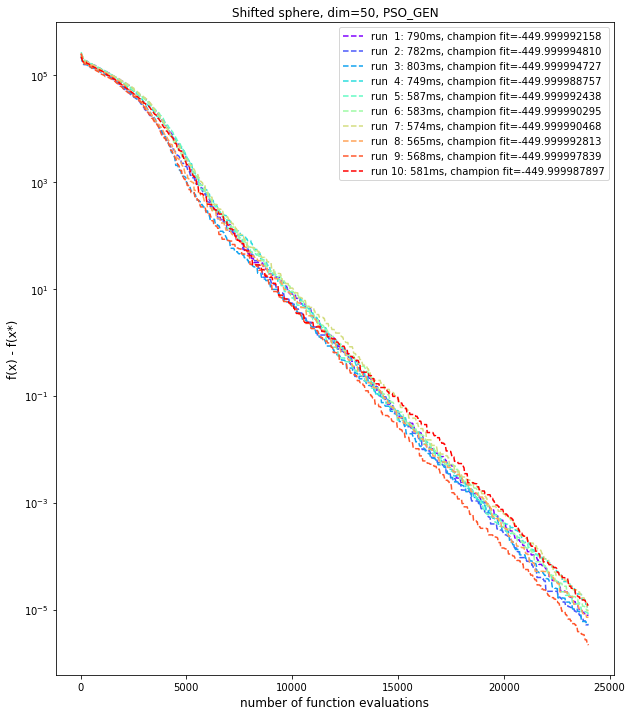

In [8]:
plot_f_minus_fstar_10(runs, Shifted_sphere.BIAS, title="Shifted sphere, dim=50, PSO_GEN")

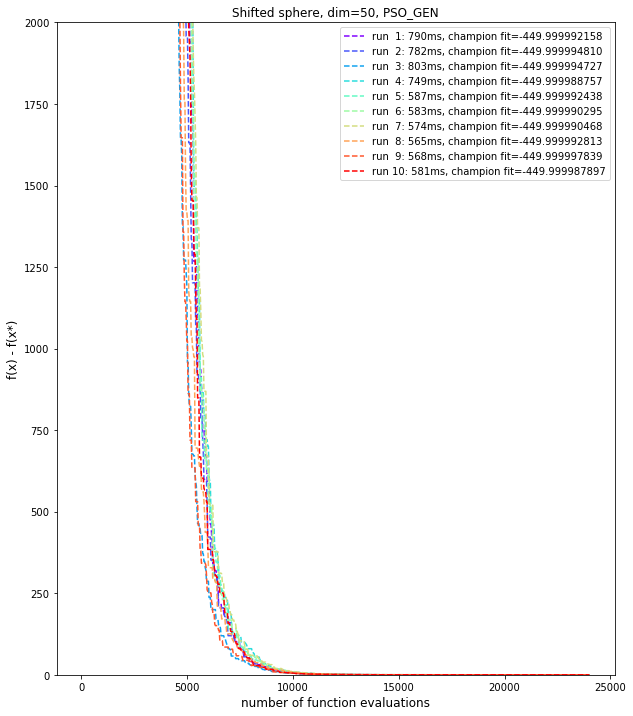

In [9]:
plot_f_minus_fstar_10(runs, Shifted_sphere.BIAS,
                      title="Shifted sphere, dim=50, PSO_GEN",
                      ylog=False, ylim=[0, 2000])